---

   # PROJECT: - CREDIT DEFAULT RISK ANALYSIS AND DETECTION #

    
### AUTHOR: - SHARATH RAJAGOPALAN
    
    
### COMPANY: - HEXAWARE TECHNOLOGIES 
        
        
### POSITION: - DATA SCIENTIST INTERN

---


# INTRODUCTION

## Data

We will be using the Loan Default DataSet obtained from InstaLend.

Instalend is an online loan market place who provides personal loans, business loans and vehicle loans to its customers.

# PROBLEM STATEMENT

#### CREDIT DEFAULT RISK ANALYSIS AND DETECTION

Like most other lending companies, they need to assess the risk factor before lending to customers to minimize the source of financial loss (also called credit loss).

### Our Goal
Given the customer data we are here to build a prediction model to find whether the applicant is likely to default or not. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 


### Data Overview: -

In [15]:
import pandas as pd

In [16]:
data_info = pd.read_csv('/Users/sharathrajagopalan/Desktop/Hexaware Internship/Task 2/data dictionary.csv',index_col='Features')

In [17]:
data_info.head()

,Id,Description
Features,,
cust_id,1,Unique ID of customer
year,2,Loan Applied Year
state,3,State where loan was approved
date_issued,4,Date when loan was issued
date_final,5,Final date of loan payment


In [18]:
print(data_info.loc['dti']['Description'])

Debt-to-Income(DTI) is the percentage of a consumer's monthly gross income that goes toward paying debts.


In [19]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [20]:
feat_info('own_type')

A status provided by the borrower during registration. Possible values are MORTGAGE, OTHER, NONE, ANY, RENT, OWN


# INSTALLING LIBRARIES: -

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [22]:
df = pd.read_csv('/Users/sharathrajagopalan/Desktop/Hexaware Internship/Task 2/LoanDefaultData.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
cust_id              887379 non-null int64
year                 887379 non-null int64
state                887379 non-null object
date_issued          887379 non-null object
date_final           887379 non-null int64
emp_duration         887379 non-null float64
own_type             887379 non-null object
income_type          887379 non-null object
app_type             887379 non-null object
loan_purpose         887379 non-null object
interest_payments    887379 non-null object
grade                887379 non-null object
annual_pay           887379 non-null int64
loan_amount          887379 non-null int64
interest_rate        887379 non-null float64
loan_duration        887379 non-null object
dti                  887379 non-null float64
total_pymnt          887379 non-null float64
total_rec_prncp      887379 non-null float64
recoveries           887379 non-null float64
installm

In [24]:
df.head(10)

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,...,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,...,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,...,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,...,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,...,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,...,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0
5,84098,2007,Chhattisgarh,01/06/2007,1012008,9.0,MORTGAGE,Low,INDIVIDUAL,other,...,66624,2500,7.43,36 months,10.36,2600.23,2500.00,0.00,77.69,0
6,83979,2007,Mizoram,01/06/2007,1012008,1.0,MORTGAGE,Low,INDIVIDUAL,other,...,80000,3000,7.43,36 months,0.39,3120.26,3000.00,0.00,93.23,0
7,85818,2007,Gujarat,01/06/2007,1042010,0.5,RENT,Low,INDIVIDUAL,other,...,28000,5000,11.22,36 months,3.51,5858.35,5000.00,0.00,164.23,0
8,83489,2007,Tripura,01/06/2007,1032010,3.0,MORTGAGE,Low,INDIVIDUAL,other,...,6500,2600,8.38,36 months,6.46,2342.01,1962.69,28.63,81.94,1
9,81085,2007,Haryana,01/06/2007,1082008,3.0,RENT,Low,INDIVIDUAL,other,...,60000,10500,11.22,36 months,19.50,11219.80,10500.00,0.00,344.87,0


---


# EXPLORATORY DATA ANALYSIS: -

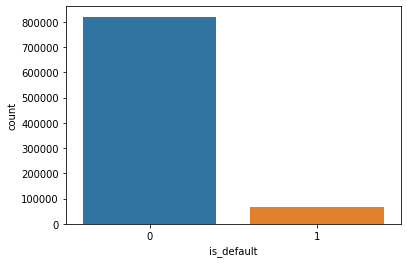

In [25]:
sns.countplot(x='is_default',data=df)

### From the above bar graph we can infer that this is an unbalanced data.

(0, 45000)

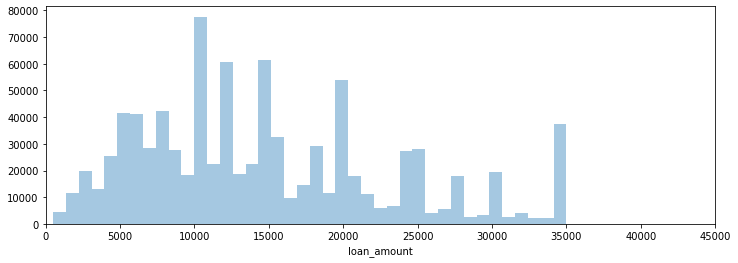

In [26]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amount'],kde=False,bins=40)
plt.xlim(0,45000)

In [27]:
df.corr()

,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
cust_id,1.000000,0.820601,-0.199171,0.012529,0.033990,0.063803,-0.142963,0.067781,-0.597261,-0.556328,-0.114386,0.025347,-0.190691
year,0.820601,1.000000,-0.184786,0.048980,0.035911,0.103722,-0.063632,0.078530,-0.464010,-0.443454,-0.100694,0.075157,-0.165122
date_final,-0.199171,-0.184786,1.000000,-0.008798,-0.013948,-0.023783,0.049275,-0.017203,0.180982,0.199173,0.041700,-0.008882,0.178373
emp_duration,0.012529,0.048980,-0.008798,1.000000,0.063382,0.103898,0.008943,0.020660,0.049354,0.036753,0.004163,0.088634,-0.015821
annual_pay,0.033990,0.035911,-0.013948,0.063382,1.000000,0.332697,-0.072785,-0.087409,0.160879,0.149993,0.007717,0.326181,-0.034142
loan_amount,0.063803,0.103722,-0.023783,0.103898,0.332697,1.000000,0.145023,0.020675,0.474626,0.390473,0.073150,0.944977,0.003512
interest_rate,-0.142963,-0.063632,0.049275,0.008943,-0.072785,0.145023,1.000000,0.079903,0.170506,0.054975,0.106840,0.133075,0.175450
dti,0.067781,0.078530,-0.017203,0.020660,-0.087409,0.020675,0.079903,1.000000,-0.041529,-0.052056,0.001162,0.014333,0.009961
total_pymnt,-0.597261,-0.464010,0.180982,0.049354,0.160879,0.474626,0.170506,-0.041529,1.000000,0.970043,0.038361,0.514954,-0.042515
total_rec_prncp,-0.556328,-0.443454,0.199173,0.036753,0.149993,0.390473,0.054975,-0.052056,0.970043,1.000000,-0.037742,0.449439,-0.095991


(10, 0)

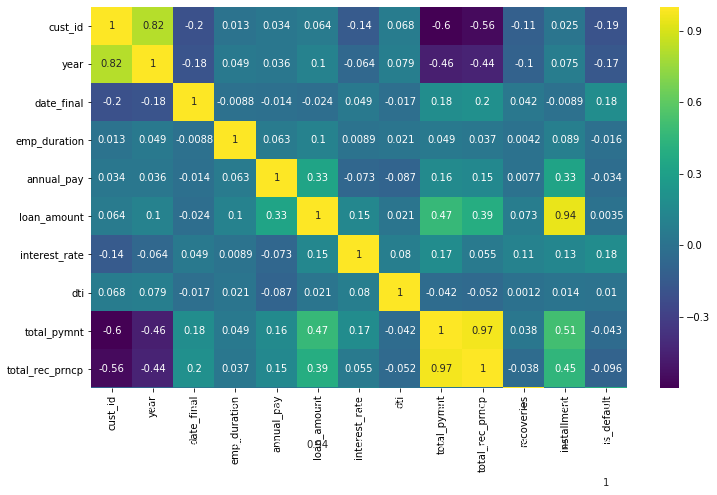

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

#### NOTE: - The loan amount feature has 0.94 correlation with the installment feature.

In [29]:
feat_info('installment')

Monthly payment owed by the borrower


In [30]:
feat_info('loan_amount')

Loan amount required by the customer


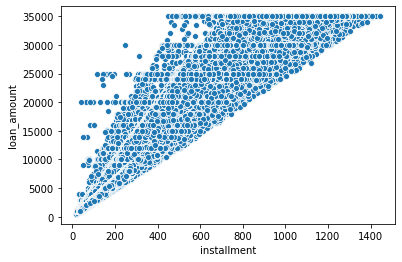

In [31]:
sns.scatterplot(x='installment',y='loan_amount',data=df)

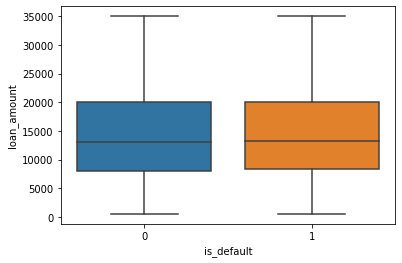

In [32]:
sns.boxplot(x='is_default',y='loan_amount',data=df)

#### 0 stands for not defaulted and 1 stands for defaulted

In [33]:
df.groupby('is_default')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
is_default,,,,,,,,
0,819950.0,14746.769651,8432.461686,500.0,8000.0,13000.0,20000.0,35000.0
1,67429.0,14858.564935,8471.158706,500.0,8325.0,13175.0,20000.0,35000.0


In [34]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [35]:
sorted(df['income_type'].unique())

['High', 'Low', 'Medium']

In [36]:
sorted(df['loan_purpose'].unique())

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

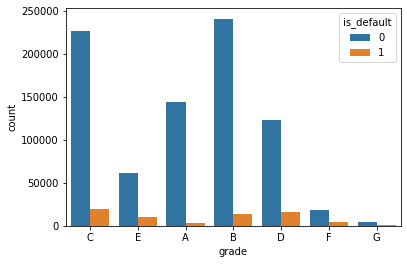

In [37]:
sns.countplot(x='grade',data=df,hue='is_default')

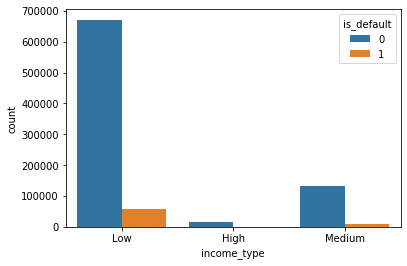

In [38]:
sns.countplot(x='income_type',data=df,hue='is_default')

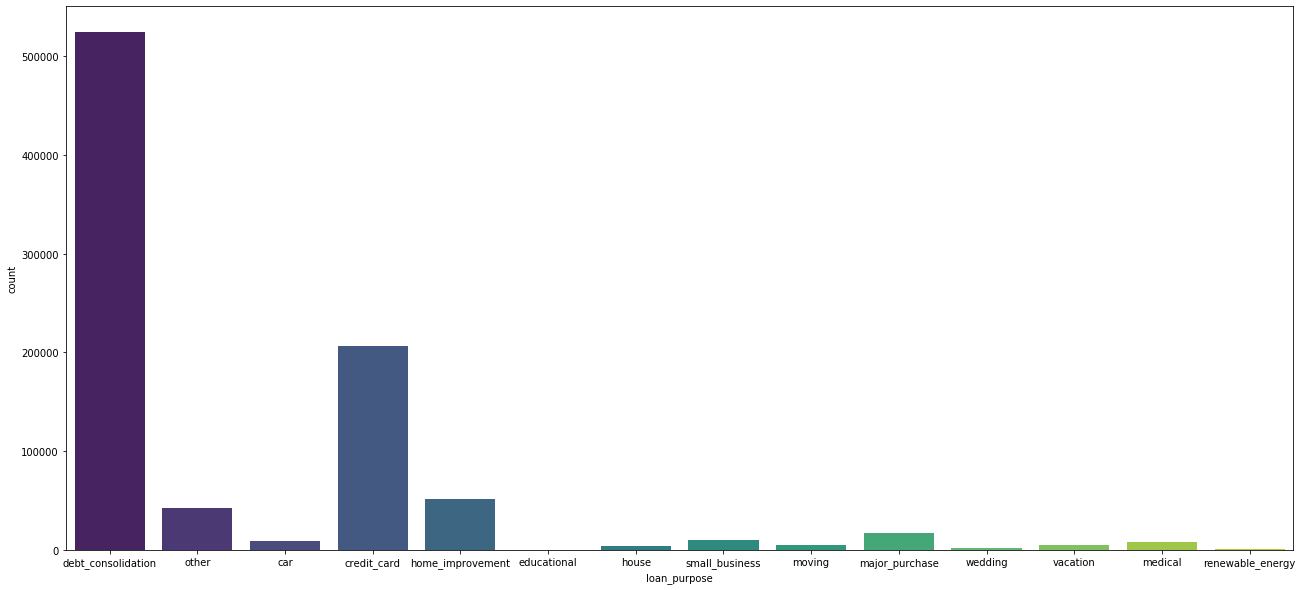

In [39]:
plt.figure(figsize=(22,10))
sns.countplot(x='loan_purpose',data=df,palette='viridis')

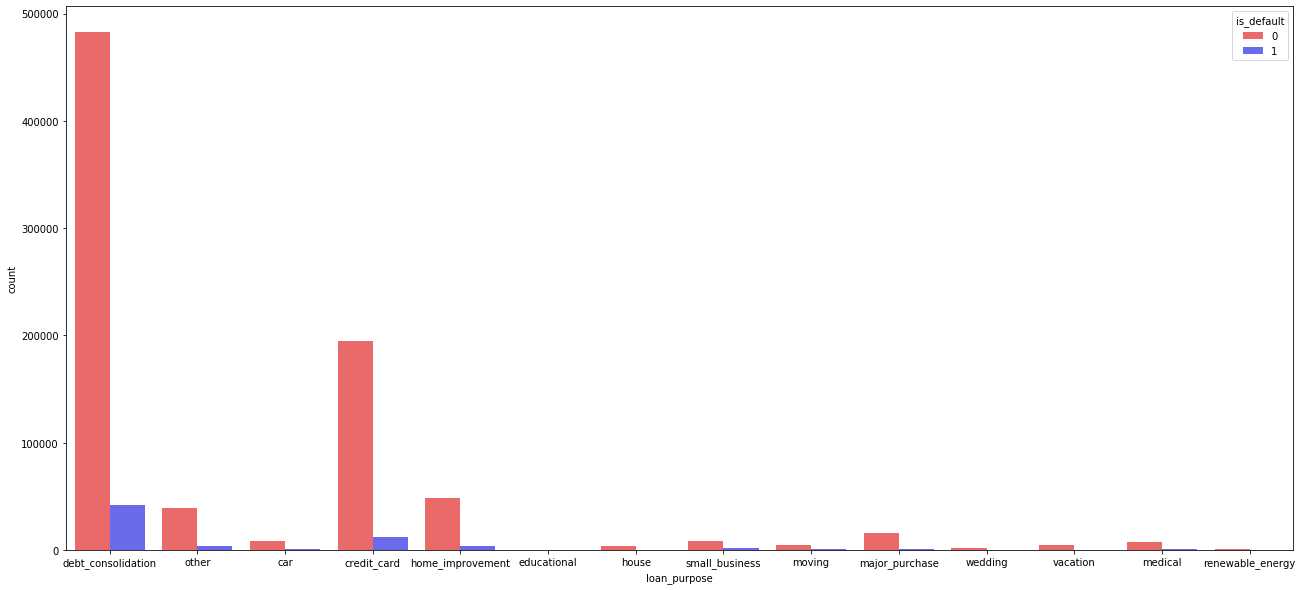

In [40]:
plt.figure(figsize=(22,10))

sns.countplot(x='loan_purpose',data=df,palette='seismic_r' ,hue='is_default')

In [41]:
df['is_default'].unique()

array([1, 0])

In [42]:
df['applicant_status'] = df['is_default'].map({1:'Defaulted',0:'Not Defaulted'})

In [43]:
df[['is_default','applicant_status']]

,is_default,applicant_status
0,1,Defaulted
1,0,Not Defaulted
2,0,Not Defaulted
3,0,Not Defaulted
4,0,Not Defaulted
...,...,...
887374,0,Not Defaulted
887375,0,Not Defaulted
887376,0,Not Defaulted
887377,0,Not Defaulted


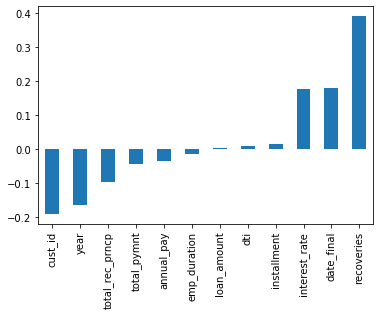

In [44]:
df.corr()['is_default'].sort_values().drop('is_default').plot(kind='bar')

---

# DATA PREPROCESSING

In [45]:
df.head()

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,...,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default,applicant_status
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,...,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1,Defaulted
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,...,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0,Not Defaulted
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,...,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0,Not Defaulted
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,...,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0,Not Defaulted
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,...,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0,Not Defaulted


In [46]:
len(df)

887379

In [47]:
df.isnull().sum()

cust_id              0
year                 0
state                0
date_issued          0
date_final           0
emp_duration         0
own_type             0
income_type          0
app_type             0
loan_purpose         0
interest_payments    0
grade                0
annual_pay           0
loan_amount          0
interest_rate        0
loan_duration        0
dti                  0
total_pymnt          0
total_rec_prncp      0
recoveries           0
installment          0
is_default           0
applicant_status     0
dtype: int64

### There are no missing or null values.

In [48]:
sorted(df['emp_duration'].dropna().unique())

[0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.05, 7.0, 8.0, 9.0, 10.0]

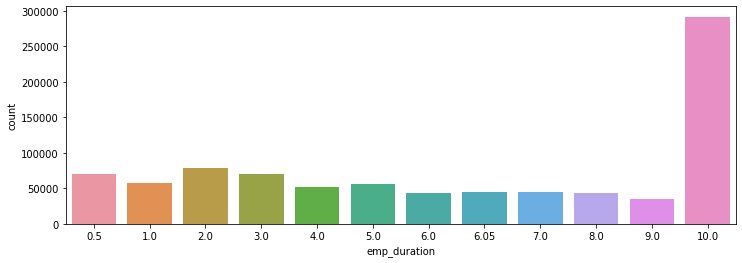

In [49]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_duration',data=df)

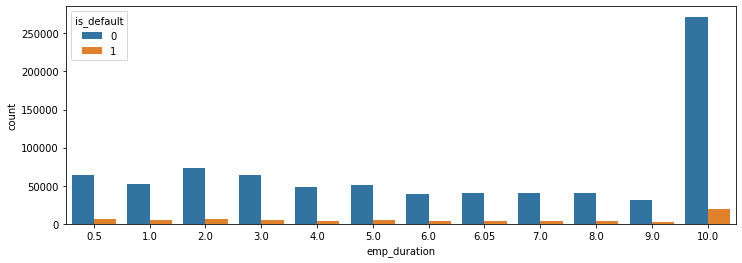

In [50]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_duration',data=df,hue='is_default')

In [51]:
df = df.drop('emp_duration',axis=1)

In [52]:
df['income_type'].head(10)

0     Low
1     Low
2     Low
3     Low
4    High
5     Low
6     Low
7     Low
8     Low
9     Low
Name: income_type, dtype: object

In [53]:
df['interest_payments'].head(10)

0     Low
1     Low
2    High
3     Low
4     Low
5     Low
6     Low
7     Low
8     Low
9     Low
Name: interest_payments, dtype: object

In [54]:
df = df.drop('interest_payments',axis=1)

## Dealing with Categorical Variables and Dummy Variables

In [55]:
df.select_dtypes(['object']).columns

Index(['state', 'date_issued', 'own_type', 'income_type', 'app_type',
       'loan_purpose', 'grade', 'loan_duration', 'applicant_status'],
      dtype='object')

## Now lets go through individual features: -

### loan_duration feature

In [56]:
df['loan_duration'].value_counts()

 36 months    621125
 60 months    266254
Name: loan_duration, dtype: int64

In [57]:
df['loan_duration'] = df['loan_duration'].apply(lambda term: int(term[:3]))

In [58]:
df['loan_duration']

0         36
1         36
2         36
3         36
4         36
          ..
887374    36
887375    36
887376    60
887377    60
887378    60
Name: loan_duration, Length: 887379, dtype: int64

### grade feature

In [59]:
dummies = pd.get_dummies(df['grade'],drop_first=True)

In [60]:
df = pd.concat([df.drop('grade',axis=1),dummies],axis=1)

In [61]:
df.columns

Index(['cust_id', 'year', 'state', 'date_issued', 'date_final', 'own_type',
       'income_type', 'app_type', 'loan_purpose', 'annual_pay', 'loan_amount',
       'interest_rate', 'loan_duration', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'is_default',
       'applicant_status', 'B', 'C', 'D', 'E', 'F', 'G'],
      dtype='object')

In [62]:
df.select_dtypes(['object']).columns

Index(['state', 'date_issued', 'own_type', 'income_type', 'app_type',
       'loan_purpose', 'applicant_status'],
      dtype='object')

### app_type and loan_purpose features

In [63]:
dummies = pd.get_dummies(df[['app_type','loan_purpose' ]],drop_first=True)
df = df.drop(['app_type','loan_purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)


In [64]:
df.columns

Index(['cust_id', 'year', 'state', 'date_issued', 'date_final', 'own_type',
       'income_type', 'annual_pay', 'loan_amount', 'interest_rate',
       'loan_duration', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment', 'is_default', 'applicant_status', 'B', 'C', 'D', 'E',
       'F', 'G', 'app_type_JOINT', 'loan_purpose_credit_card',
       'loan_purpose_debt_consolidation', 'loan_purpose_educational',
       'loan_purpose_home_improvement', 'loan_purpose_house',
       'loan_purpose_major_purchase', 'loan_purpose_medical',
       'loan_purpose_moving', 'loan_purpose_other',
       'loan_purpose_renewable_energy', 'loan_purpose_small_business',
       'loan_purpose_vacation', 'loan_purpose_wedding'],
      dtype='object')

### own_type feature

In [65]:
df['own_type'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: own_type, dtype: int64

#### Lets replace NONE and ANY with OTHER so that we have just four Categories

In [66]:
df['own_type']=df['own_type'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['own_type'],drop_first=True)
df = df.drop('own_type',axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.select_dtypes(['object']).columns

Index(['state', 'date_issued', 'income_type', 'applicant_status'], dtype='object')

---


# FEATURE SELECTION

### date_issued feature

In [68]:
df = df.drop('date_issued',axis=1)

In [69]:
df.select_dtypes(['object']).columns

Index(['state', 'income_type', 'applicant_status'], dtype='object')

### income_type feature

In [70]:
dummies = pd.get_dummies(df['income_type'],drop_first=True)

In [71]:
df = pd.concat([df.drop('income_type',axis=1),dummies],axis=1)

In [72]:
df.columns

Index(['cust_id', 'year', 'state', 'date_final', 'annual_pay', 'loan_amount',
       'interest_rate', 'loan_duration', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'is_default',
       'applicant_status', 'B', 'C', 'D', 'E', 'F', 'G', 'app_type_JOINT',
       'loan_purpose_credit_card', 'loan_purpose_debt_consolidation',
       'loan_purpose_educational', 'loan_purpose_home_improvement',
       'loan_purpose_house', 'loan_purpose_major_purchase',
       'loan_purpose_medical', 'loan_purpose_moving', 'loan_purpose_other',
       'loan_purpose_renewable_energy', 'loan_purpose_small_business',
       'loan_purpose_vacation', 'loan_purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'Low', 'Medium'],
      dtype='object')

In [73]:
df.select_dtypes(['object']).columns

Index(['state', 'applicant_status'], dtype='object')

### state feature

In [74]:
df['state'].value_counts()

Chhattisgarh         32211
Sikkim               32130
Haryana              31999
Punjab               31853
Assam                31792
Goa                  31786
Madhya Pradesh       31752
Uttar Pradesh        31750
Maharashtra          31732
Himachal Pradesh     31730
Arunachal Pradesh    31703
Nagaland             31701
Andhra Pradesh       31688
Kerala               31687
Tripura              31669
Rajasthan            31669
Karnataka            31619
Manipur              31603
West Bengal          31596
Odisha               31587
Telangana            31586
Bihar                31577
Jharkhand            31550
Gujarat              31536
Uttarakhand          31536
Mizoram              31536
Tamil Nadu           31517
Meghalaya            31284
Name: state, dtype: int64

In [75]:
df = df.drop('state',axis=1)

### applicant_status feature

In [76]:
df = df.drop('applicant_status',axis=1)

In [103]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [111]:
df.to_csv('instalend-filtered.csv')

In [112]:
df.head(10)

,cust_id,year,date_final,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,...,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,OTHER,OWN,RENT,Low,Medium
0,180675,2007,1032009,73000,25000,10.91,36,22.13,13650.38,8767.32,...,0,0,0,0,0,0,0,0,1,0
1,85781,2007,1072010,40000,1400,10.91,36,8.61,1663.04,1400.00,...,1,0,0,0,0,0,0,1,1,0
2,85675,2007,1062010,25000,1000,14.07,36,16.27,1231.38,1000.00,...,1,0,0,0,0,0,0,1,1,0
3,84918,2007,1042008,65000,5000,7.43,36,0.28,5200.44,5000.00,...,1,0,0,0,0,0,0,0,1,0
4,84670,2007,1082009,300000,5000,7.75,36,5.38,5565.65,5000.00,...,1,0,0,0,0,0,0,0,0,0
5,84098,2007,1012008,66624,2500,7.43,36,10.36,2600.23,2500.00,...,1,0,0,0,0,0,0,0,1,0
6,83979,2007,1012008,80000,3000,7.43,36,0.39,3120.26,3000.00,...,1,0,0,0,0,0,0,0,1,0
7,85818,2007,1042010,28000,5000,11.22,36,3.51,5858.35,5000.00,...,1,0,0,0,0,0,0,1,1,0
8,83489,2007,1032010,6500,2600,8.38,36,6.46,2342.01,1962.69,...,1,0,0,0,0,0,0,0,1,0
9,81085,2007,1082008,60000,10500,11.22,36,19.50,11219.80,10500.00,...,1,0,0,0,0,0,0,1,1,0


---

# MODEL DEVELOPMENT

### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('is_default',axis=1).values
y = df['is_default'].values

In [80]:
print(len(df))

887379


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## MODEL BUILDING: -

In [82]:
df.head()

,cust_id,year,date_final,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,...,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,OTHER,OWN,RENT,Low,Medium
0,180675,2007,1032009,73000,25000,10.91,36,22.13,13650.38,8767.32,...,0,0,0,0,0,0,0,0,1,0
1,85781,2007,1072010,40000,1400,10.91,36,8.61,1663.04,1400.00,...,1,0,0,0,0,0,0,1,1,0
2,85675,2007,1062010,25000,1000,14.07,36,16.27,1231.38,1000.00,...,1,0,0,0,0,0,0,1,1,0
3,84918,2007,1042008,65000,5000,7.43,36,0.28,5200.44,5000.00,...,1,0,0,0,0,0,0,0,1,0
4,84670,2007,1082009,300000,5000,7.75,36,5.38,5565.65,5000.00,...,1,0,0,0,0,0,0,0,0,0


---
### DECISION TREE MODEL

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions and Evaluations of Decision Tree Model

In [86]:
predictions = dtree.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    164024
           1       0.84      0.85      0.84     13452

    accuracy                           0.98    177476
   macro avg       0.91      0.92      0.92    177476
weighted avg       0.98      0.98      0.98    177476



In [89]:
print(confusion_matrix(y_test,predictions))

[[161787   2237]
 [  2000  11452]]


---

### RANDOM FOREST MODEL

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(n_estimators=20)

In [92]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluations of Random Forest Model

In [93]:
predictions = rfc.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    164024
           1       1.00      0.81      0.89     13452

    accuracy                           0.99    177476
   macro avg       0.99      0.91      0.94    177476
weighted avg       0.99      0.99      0.98    177476



In [96]:
print(confusion_matrix(y_test,predictions))

[[163988     36]
 [  2547  10905]]


---

### LOGISTIC REGRESSION

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/sharathrajagopalan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations of Logistic Regression Model

In [99]:
predictions = logmodel.predict(X_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    164024
           1       0.96      0.29      0.44     13452

    accuracy                           0.94    177476
   macro avg       0.95      0.64      0.71    177476
weighted avg       0.95      0.94      0.93    177476



In [102]:
print(confusion_matrix(y_test,predictions))

[[163860    164]
 [  9612   3840]]


## END